In [25]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [26]:
np.random.seed(101) 
tf.set_random_seed(101) 
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50)
y=np.linspace(0,50,50)
y+=np.random.normal(5,10,50)
n = len(x) # Number of data points 

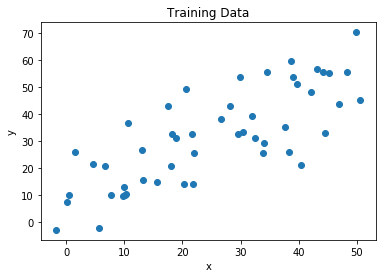

In [27]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show() 

In [28]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")
learning_rate=0.01
training_epochs=1000
y_predict=tf.add(tf.multiply(X,W),b)
cost=tf.reduce_sum(tf.pow((y_predict-Y),2))/(2*n)
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [29]:
with tf.Session() as sess: 
    sess.run(init) 
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 70.52556 W = 1.2142156 b = 0.34935063
Epoch 100 : cost = 69.21802 W = 1.1985573 b = 1.1149824
Epoch 150 : cost = 68.21429 W = 1.1845715 b = 1.7988329
Epoch 200 : cost = 67.44872 W = 1.1720796 b = 2.409637
Epoch 250 : cost = 66.86941 W = 1.1609222 b = 2.955192
Epoch 300 : cost = 66.43532 W = 1.1509565 b = 3.4424694
Epoch 350 : cost = 66.1141 W = 1.1420555 b = 3.877697
Epoch 400 : cost = 65.88021 W = 1.1341054 b = 4.2664194
Epoch 450 : cost = 65.71364 W = 1.1270045 b = 4.6136317
Epoch 500 : cost = 65.59861 W = 1.120662 b = 4.923754
Epoch 550 : cost = 65.522804 W = 1.1149968 b = 5.200763
Epoch 600 : cost = 65.47658 W = 1.1099367 b = 5.4481797
Epoch 650 : cost = 65.45241 W = 1.105417 b = 5.669171
Epoch 700 : cost = 65.44453 W = 1.1013808 b = 5.8665304
Epoch 750 : cost = 65.44838 W = 1.0977756 b = 6.0428085
Epoch 800 : cost = 65.46053 W = 1.0945556 b = 6.200254
Epoch 850 : cost = 65.47832 W = 1.0916792 b = 6.3408957
Epoch 900 : cost = 65.499756 W = 1.0891103 b = 6.466509
E

In [30]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 65.54788 Weight = 1.0847663 bias = 6.678915 



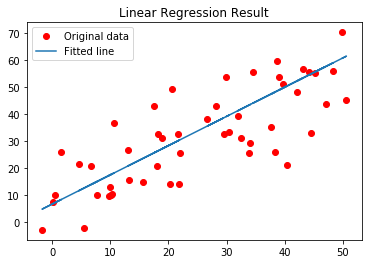

In [31]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 